In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

plt.style.use('ggplot')
pd.options.display.max_columns=100

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.corpus import stopwords
stopwords=stopwords.words('english')


def review_sentiment_scores(comment):
    review_tokenized=nltk.word_tokenize(comment)
    review_lower=[w.lower() for w in review_tokenized]
    review_lemmatized=[lemmatizer.lemmatize(w) for w in review_lower]
    review_filtered=[w for w in review_lemmatized if w not in stopwords]
    final_comment=' '.join(review_filtered)
    
    score=sia.polarity_scores(final_comment)
    return score

In [3]:
ola=pd.read_csv(r"C:\Users\berid\python\csv_files\Ola vs Uber\Ola Customer Reviews.csv")
uber=pd.read_csv(r"C:\Users\berid\python\csv_files\Ola vs Uber\Uber Customer Reviews.csv")

C:\Users\berid\AppData\Local\Temp\ipykernel_8628\411626631.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ola=pd.read_csv(r"C:\Users\berid\python\csv_files\Ola vs Uber\Ola Customer Reviews.csv")
C:\Users\berid\AppData\Local\Temp\ipykernel_8628\411626631.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  uber=pd.read_csv(r"C:\Users\berid\python\csv_files\Ola vs Uber\Uber Customer Reviews.csv")


# Senitment Analysis 

In [4]:
%%time

ola['review_date']=pd.to_datetime(ola['review_date'])
uber['review_date']=pd.to_datetime(uber['review_date'])

CPU times: total: 1.69 s
Wall time: 1.74 s


In [ ]:
size=len(ola['review_description'])
step_size=int(size/100)


ola_compound_scores=[]
for i,review in enumerate(ola['review_description']):
    try:
        ola_compound_scores.append(review_sentiment_scores(review))
    except:
        ola_compound_scores.append(None)
    if i!=0 and i % step_size==0:
        print(f'Progress: {int(i/step_size)} %')
        
pickle.dump(ola_compound_scores,open('csv_files/Ola vs Uber/ola_compound_scores.pickle','wb'))

In [ ]:
size=len(uber['review_description'])
step_size=int(size/100)


uber_compound_scores=[]
for i,review in enumerate(uber['review_description']):
    try:
        uber_compound_scores.append(review_sentiment_scores(review))
    except:
        uber_compound_scores.append(None)
    if i!=0 and i % step_size==0:
        print(f'Progress: {int(i/step_size)} %')
        
pickle.dump(uber_compound_scores,open('csv_files/Ola vs Uber/uber_compound_scores.pickle','wb'))

In [5]:
ola_compound_scores=pickle.load(open('csv_files/Ola vs Uber/ola_compound_scores.pickle','rb'))
ola_compound_scores=[i['compound'] if i is not None else None for i in ola_compound_scores]
ola['compound_score']=ola_compound_scores

In [6]:
uber_compound_scores=pickle.load(open('csv_files/Ola vs Uber/uber_compound_scores.pickle','rb'))
uber_compound_scores=[i['compound'] if i is not None else None for i in uber_compound_scores]
uber['compound_score']=uber_compound_scores

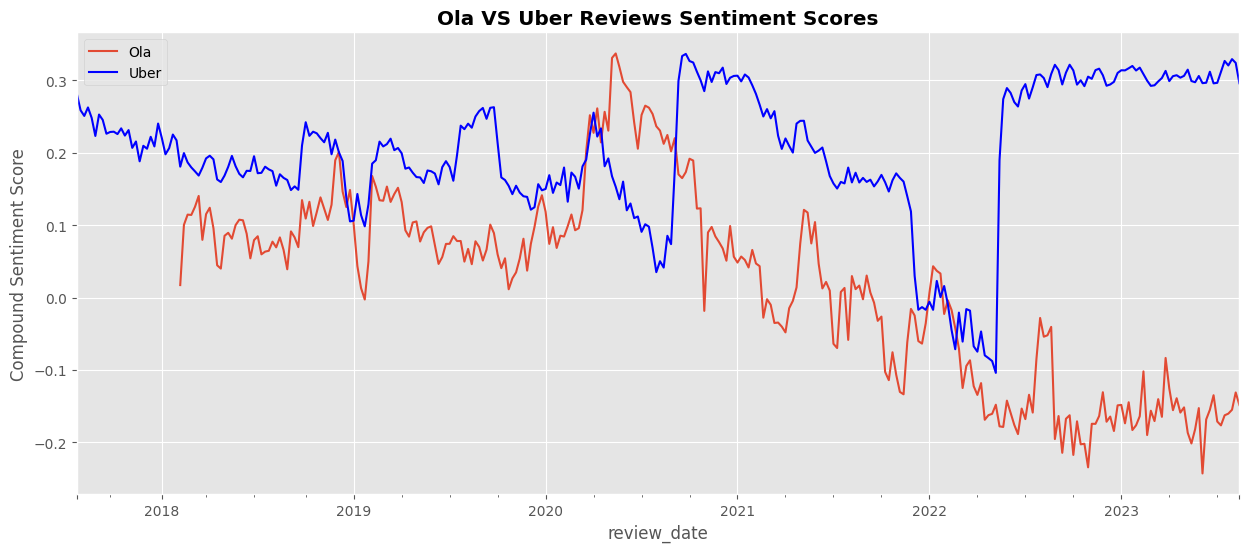

In [7]:
fig,ax=plt.subplots(figsize=(15,6))

ola.groupby([ola['review_date'].dt.to_period('W')]).filter(lambda x:x['review_id'].count()>=10)\
.groupby([ola['review_date'].dt.to_period('W')])['compound_score'].mean().plot(ax=ax,label='Ola')
uber.groupby([uber['review_date'].dt.to_period('W')])['compound_score'].mean().plot(ax=ax,color='blue',label='Uber')
ax.set_title('Ola VS Uber Reviews Sentiment Scores',fontweight='bold')
ax.legend()
ax.set_ylabel('Compound Sentiment Score')
plt.savefig('fig1.pdf')
plt.show()


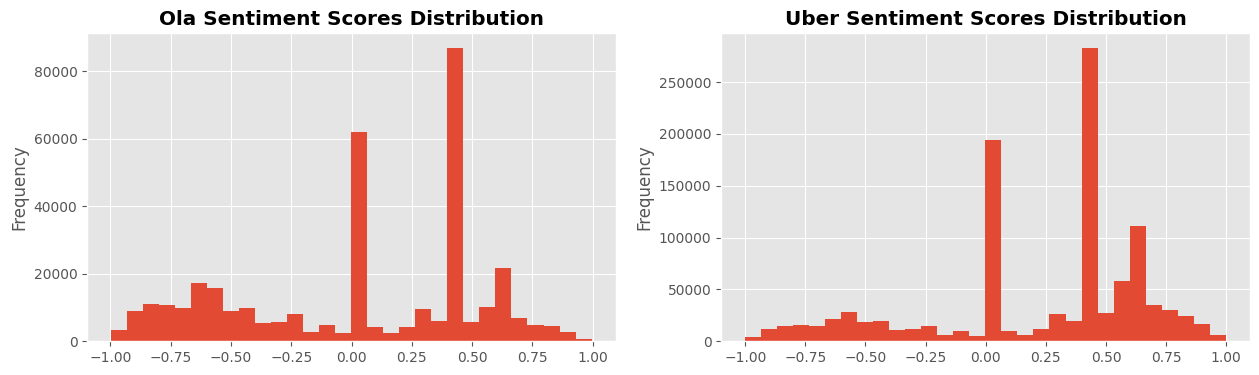

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
ola['compound_score'].plot.hist(ax=ax1,bins=30)
ax1.set_title('Ola Sentiment Scores Distribution',fontweight='bold')

uber['compound_score'].plot.hist(ax=ax2,bins=30)
ax2.set_title('Uber Sentiment Scores Distribution',fontweight='bold')

plt.savefig('fig2.pdf')
plt.show()


In [9]:
from PyPDF2 import PdfMerger
import os
merger = PdfMerger()

for file in os.listdir():
    if 'fig' in file:
        merger.append(file)
        
merger.write("result.pdf")
merger.close()